In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import statsmodels.api as sm
from matplotlib_venn import venn3

In [8]:
SE=pd.read_csv('Figure5_data/SE.MATS.JCEC.txt',sep='\t')
RI=pd.read_csv('Figure5_data/RI.MATS.JCEC.txt',sep='\t')
MXE=pd.read_csv('Figure5_data/MXE.MATS.JCEC.txt',sep='\t')
A5SS=pd.read_csv('Figure5_data/A5SS.MATS.JCEC.txt',sep='\t')
A3SS=pd.read_csv('Figure5_data/A3SS.MATS.JCEC.txt',sep='\t')

SE=SE[(SE.FDR.astype(float)<0.05) & (abs(SE.IncLevelDifference)>0.1)]
RI=RI[(RI.FDR.astype(float)<0.05) & (abs(RI.IncLevelDifference)>0.1)]
MXE=MXE[(MXE.FDR.astype(float)<0.05) & (abs(MXE.IncLevelDifference)>0.1)]
A5SS=A5SS[(A5SS.FDR.astype(float)<0.05) & (abs(A5SS.IncLevelDifference)>0.1)]
A3SS=A3SS[(A3SS.FDR.astype(float)<0.05) & (abs(A3SS.IncLevelDifference)>0.1)]

aire=pd.read_csv('Supplemental_Figure7_data/human_aire_dep_genes_san.csv')
aire=np.array(aire.ensembl_gene_id)
fezf2=pd.read_csv('Supplemental_Figure7_data/human_fezf2_dep_genes.csv')
fezf2=np.array(fezf2.ensembl_gene_id)
housekeeping=pd.read_csv('Supplemental_Figure7_data/housekeeping_genes.csv')
housekeeping=np.array(housekeeping.ensembl_gene_id)
tra=pd.read_csv('Supplemental_Figure7_data/tra_genes.csv')
tra=np.array(tra.ensembl_gene_id)
other_tra=np.setdiff1d(tra,aire)
other_tra=np.setdiff1d(other_tra,fezf2)

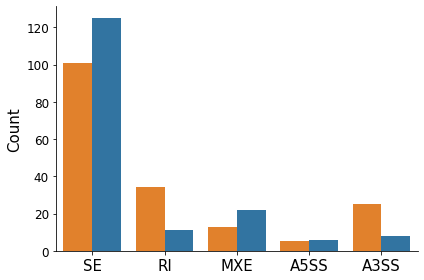

In [9]:
SE1=SE[SE.GeneID.isin(aire)]
RI1=RI[RI.GeneID.isin(aire)]
MXE1=MXE[MXE.GeneID.isin(aire)]
A3SS1=A3SS[A3SS.GeneID.isin(aire)]
A5SS1=A5SS[A5SS.GeneID.isin(aire)]

row=[]
for df1,name in zip([SE1,RI1,MXE1,A5SS1,A3SS1],['SE','RI','MXE','A5SS','A3SS']):
        high=df1[df1.IncLevelDifference>0].shape[0]
        low=df1[df1.IncLevelDifference<0].shape[0]
        row.append([name,high,low])
splice=pd.DataFrame(row,columns=['Splice','mTEC_hi','mTEC_lo'])

df1=splice.melt( id_vars=['Splice'], value_vars=['mTEC_lo','mTEC_hi'])
sns.barplot(x='Splice',y='value',hue='variable',data=df1,palette=[sns.color_palette()[1],sns.color_palette()[0]])
plt.ylabel('Count',fontsize=15)
plt.xlabel('')
sns.despine()
plt.legend('',frameon=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig8A.pdf',dpi=500)
plt.show()
plt.close()

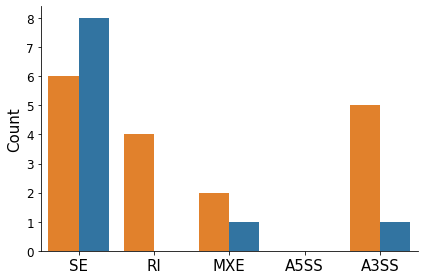

In [12]:
SE1=SE[SE.GeneID.isin(fezf2)]
RI1=RI[RI.GeneID.isin(fezf2)]
MXE1=MXE[MXE.GeneID.isin(fezf2)]
A3SS1=A3SS[A3SS.GeneID.isin(fezf2)]
A5SS1=A5SS[A5SS.GeneID.isin(fezf2)]

row=[]
for df1,name in zip([SE1,RI1,MXE1,A5SS1,A3SS1],['SE','RI','MXE','A5SS','A3SS']):
        high=df1[df1.IncLevelDifference>0].shape[0]
        low=df1[df1.IncLevelDifference<0].shape[0]
        row.append([name,high,low])
splice=pd.DataFrame(row,columns=['Splice','mTEC_hi','mTEC_lo'])

df1=splice.melt( id_vars=['Splice'], value_vars=['mTEC_lo','mTEC_hi'])
sns.barplot(x='Splice',y='value',hue='variable',data=df1,palette=[sns.color_palette()[1],sns.color_palette()[0]])
plt.ylabel('Count',fontsize=15)
plt.xlabel('')
sns.despine()
plt.legend('',frameon=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig8B.pdf',dpi=500)
plt.show()
plt.close()

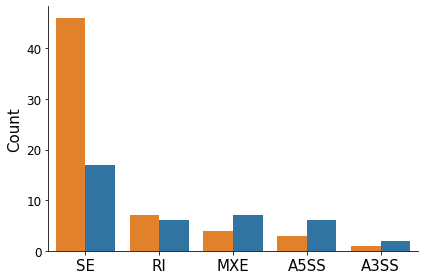

In [14]:
SE1=SE[SE.GeneID.isin(other_tra)]
RI1=RI[RI.GeneID.isin(other_tra)]
MXE1=MXE[MXE.GeneID.isin(other_tra)]
A3SS1=A3SS[A3SS.GeneID.isin(other_tra)]
A5SS1=A5SS[A5SS.GeneID.isin(other_tra)]

row=[]
for df1,name in zip([SE1,RI1,MXE1,A5SS1,A3SS1],['SE','RI','MXE','A5SS','A3SS']):
        high=df1[df1.IncLevelDifference>0].shape[0]
        low=df1[df1.IncLevelDifference<0].shape[0]
        row.append([name,high,low])
splice=pd.DataFrame(row,columns=['Splice','mTEC_hi','mTEC_lo'])

df1=splice.melt( id_vars=['Splice'], value_vars=['mTEC_lo','mTEC_hi'])
sns.barplot(x='Splice',y='value',hue='variable',data=df1,palette=[sns.color_palette()[1],sns.color_palette()[0]])
plt.ylabel('Count',fontsize=15)
plt.xlabel('')
sns.despine()
plt.legend('',frameon=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig8C.png',dpi=500)
plt.show()
plt.close()

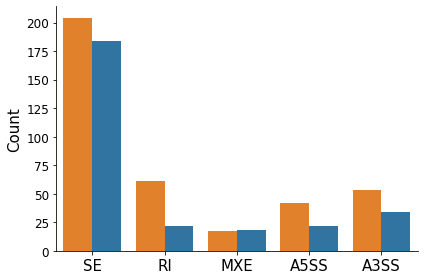

In [6]:
SE1=SE[SE.GeneID.isin(housekeeping)]
RI1=RI[RI.GeneID.isin(housekeeping)]
MXE1=MXE[MXE.GeneID.isin(housekeeping)]
A3SS1=A3SS[A3SS.GeneID.isin(housekeeping)]
A5SS1=A5SS[A5SS.GeneID.isin(housekeeping)]

row=[]
for df1,name in zip([SE1,RI1,MXE1,A5SS1,A3SS1],['SE','RI','MXE','A5SS','A3SS']):
        high=df1[df1.IncLevelDifference>0].shape[0]
        low=df1[df1.IncLevelDifference<0].shape[0]
        row.append([name,high,low])
splice=pd.DataFrame(row,columns=['Splice','mTEC_hi','mTEC_lo'])

df1=splice.melt( id_vars=['Splice'], value_vars=['mTEC_lo','mTEC_hi'])
sns.barplot(x='Splice',y='value',hue='variable',data=df1,palette=[sns.color_palette()[1],sns.color_palette()[0]])
plt.ylabel('Count',fontsize=15)
plt.xlabel('')
sns.despine()
plt.legend('',frameon=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig8D.png',dpi=500)
plt.show()
plt.close()